#                     Projeto Final CDD- Prever a nota de um filme no IMDB

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2015-11/2/11/enhanced/webdr05/anigif_enhanced-29363-1446481605-18.gif?downsize=800:*&output-format=auto&output-quality=auto" width=200 heigth=200 \>  

André Vital Tavernaro


Daniel Zelv Freund


Guilherme Batista

## LEITURA DOS DADOS

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import json
from sklearn import preprocessing

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [140]:
### Função utilizada para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [141]:
def verificador_nulo(dataframe):
    for e in dataframe.columns.tolist():
        valores_nulos = len(dataframe[dataframe[e]==0])
        if valores_nulos > 0:
            print('{0} {1}' .format(valores_nulos, e))

In [142]:
dados_filmes= pd.read_csv("tmdb_5000_movies.csv")

In [143]:
dados_filmes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

## Construção e Limpeza do Dataframe

In [144]:
dados_novos = dados_filmes[["title","runtime","budget","revenue", "vote_average", 
                            "vote_count", "popularity","genres",'release_date']].copy()

In [145]:
verificador_nulo(dados_novos)

35 runtime
1037 budget
1427 revenue
63 vote_average
62 vote_count
1 popularity


In [146]:
dados_novos.drop(dados_novos[dados_novos["budget"]==0].index,inplace=True)
dados_novos.drop(dados_novos[dados_novos["revenue"]==0].index,inplace=True)

In [147]:
verificador_nulo(dados_novos)

2 vote_average
2 vote_count


In [148]:
# mediana = dados_novos.revenue.median()
# dados_novos = dados_novos.replace(0, mediana)

Apagar os valores nulos de dados_novos (vote_average e vote_count abaixaram a precisão do calculador)

#### Criação de colunas com o nome dos generos, sendo 1 para quando o filme é daquela categoria e 0 para quando não é , isso foi feito para tirar a coluna genre

In [149]:
genres = set()
for x in dados_novos['genres']:
    for g in json.loads(x):
        genres.add(g["name"])

#### Criacão do novo dataframe incluindo as novas colunas de gênero

In [150]:
def extrai_generos(item):
    generos = {'c_' + x: 0 for x in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                              'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 
                              'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                              'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']}
    for g in json.loads(item):
        generos['c_' + g['name']] += 1
    return generos

dados_generos = pd.DataFrame(list(dados_novos['genres'].apply(extrai_generos).values))

dados_novos_junto = dados_novos.join(dados_generos)

dados_novos_junto.set_index("title",inplace=True)

dados_novos_junto.drop(columns= "genres", inplace=True)



#### Criação de novas colunas que contém o mês, ano, e dia , cada uma em sua própia coluna no dataframe 

In [151]:
dados_novos_junto['year'] , dados_novos_junto['month'] , dados_novos_junto['day'] = dados_novos_junto['release_date'].str.split('-',2).str
dados_novos_junto['year'] = pd.to_numeric(dados_novos_junto['year'])
dados_novos_junto['month'] = pd.to_numeric(dados_novos_junto['month'])
dados_novos_junto['day']  = pd.to_numeric(dados_novos_junto['day'] )

In [152]:
dados_novos_junto

,runtime,budget,revenue,vote_average,vote_count,popularity,release_date,c_Action,c_Adventure,c_Animation,...,c_Mystery,c_Romance,c_Science Fiction,c_TV Movie,c_Thriller,c_War,c_Western,year,month,day
title,,,,,,,,,,,,,,,,,,,,,
Avatar,162.0,237000000,2787965087,7.2,11800,150.437577,2009-12-10,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2009,12,10
Pirates of the Caribbean: At World's End,169.0,300000000,961000000,6.9,4500,139.082615,2007-05-19,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,19
Spectre,148.0,245000000,880674609,6.3,4466,107.376788,2015-10-26,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,10,26
The Dark Knight Rises,165.0,250000000,1084939099,7.6,9106,112.312950,2012-07-16,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012,7,16
John Carter,132.0,260000000,284139100,6.1,2124,43.926995,2012-03-07,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2012,3,7
Spider-Man 3,139.0,258000000,890871626,5.9,3576,115.699814,2007-05-01,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,1
Tangled,100.0,260000000,591794936,7.4,3330,48.681969,2010-11-24,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,11,24
Avengers: Age of Ultron,141.0,280000000,1405403694,7.3,6767,134.279229,2015-04-22,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2015,4,22
Harry Potter and the Half-Blood Prince,153.0,250000000,933959197,7.4,5293,98.885637,2009-07-07,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,7,7


### Verificando e limpando os  valores nulos e inválidos das variáveis em certa coluna

In [153]:
df = dados_novos_junto
df = df.dropna()

### Verificando a distribuição de Budget para analisar os Outliers, e, deste modo, ver sua inflûencia no resultado

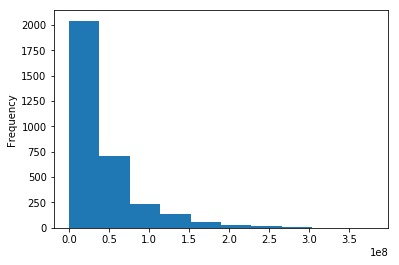

In [154]:
dados_novos_junto['budget'].plot.hist();

#### Excluindo Outliers muito extremos

In [155]:
dados_novos_junto.drop(dados_novos_junto[dados_novos_junto['budget'] > dados_novos_junto['budget'].quantile(q=0.98)].index,inplace=True)

### Normalizando a distribuição do  Budget

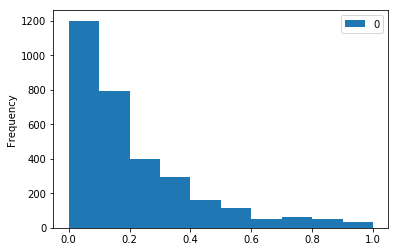

In [156]:

# Create x, where x the 'scores' column's values as floats
x = dados_novos_junto[['budget']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.plot.hist();

### Verificando a distribuição de Revenue para analisar os Outliers, e, deste modo, ver sua inflûencia no resultado

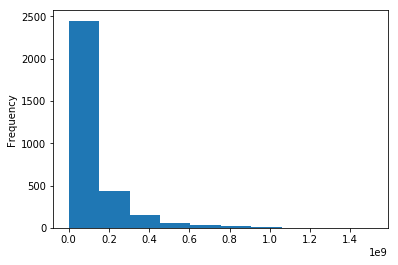

In [157]:
dados_novos_junto['revenue'].plot.hist();

#### Excluindo Outliers muito extremos

In [158]:
dados_novos_junto.drop(dados_novos_junto[dados_novos_junto['revenue'] > dados_novos_junto['revenue'].quantile(q=0.98)].index,inplace=True)

### Normalizando a distribuição do revenue

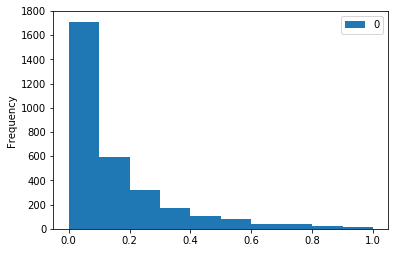

In [159]:

# Create x, where x the 'scores' column's values as floats
x = dados_novos_junto[['revenue']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.plot.hist();

## Cálculo e acurácia

**Dicionário de dados:**


Variável | Descrição
:---:|---:
title | Título do filme
runtime | Tempo de filme
budget | Orçamento
revenue | Receita
vote_average | Média dos votos
vote_count | Número de votos das pessoas
popularity | Popularidade
genres | Os diferentes gêneros de filme
c_Action | 0: não pertence; 1: pertence (gênero)
c_Adventure | 0: não pertence; 1: pertence (gênero)
c_Animation | 0: não pertence; 1: pertence (gênero)
c_Comedy | 0: não pertence; 1: pertence (gênero)
c_Crime | 0: não pertence; 1: pertence (gênero)
c_Documentary | 0: não pertence; 1: pertence (gênero)
c_Drama | 0: não pertence; 1: pertence (gênero)
c_Family | 0: não pertence; 1: pertence (gênero)
c_Fantasy | 0: não pertence; 1: pertence (gênero)
c_Foreign | 0: não pertence; 1: pertence (gênero)
c_History | 0: não pertence; 1: pertence (gênero)
c_Horror | 0: não pertence; 1: pertence (gênero)
c_Music | 0: não pertence; 1: pertence (gênero)
c_Mystery | 0: não pertence; 1: pertence (gênero)
c_Romance | 0: não pertence; 1: pertence (gênero)
c_Science Fiction | 0: não pertence; 1: pertence (gênero)
c_TV Movie | 0: não pertence; 1: pertence (gênero)
c_Thriller | 0: não pertence; 1: pertence (gênero)
c_War | 0: não pertence; 1: pertence (gênero)
c_Western | 0: não pertence; 1: pertence (gênero)
ano | ano em que o filme foi lançado
mês | mês em que o filme foi lançado
dia | dia em que o filme foi lançado

## Com a ajuda do comando Describe, poderemos analisar fatores importantes do Dataframe


 

In [160]:
dados_novos_junto.describe()

,runtime,budget,revenue,vote_average,vote_count,popularity,c_Action,c_Adventure,c_Animation,c_Comedy,...,c_Mystery,c_Romance,c_Science Fiction,c_TV Movie,c_Thriller,c_War,c_Western,year,month,day
count,3100.000000,3.100000e+03,3.100000e+03,3100.000000,3100.000000,3100.000000,2443.000000,2443.000000,2443.000000,2443.000000,...,2443.000000,2443.000000,2443.000000,2443.0,2443.000000,2443.000000,2443.000000,3100.000000,3100.000000,3100.000000
mean,109.974839,3.538152e+07,9.390915e+07,6.288935,814.581935,25.640944,0.288170,0.200164,0.060991,0.354482,...,0.087597,0.172329,0.131396,0.0,0.302088,0.038477,0.014736,2001.370323,6.998710,15.469677
std,20.452276,3.456064e+07,1.130070e+08,0.872928,1076.359827,23.143118,0.453003,0.400205,0.239362,0.478454,...,0.282766,0.377744,0.337902,0.0,0.459257,0.192385,0.120519,13.401017,3.388666,8.476305
min,41.000000,1.000000e+00,5.000000e+00,0.000000,0.000000,0.019984,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000
25%,96.000000,1.000000e+07,1.609104e+07,5.800000,164.000000,10.088800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1998.000000,4.000000,9.000000
50%,106.000000,2.500000e+07,5.098060e+07,6.300000,436.000000,19.631008,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2005.000000,7.000000,15.000000
75%,120.000000,5.000000e+07,1.277517e+08,6.900000,1007.750000,35.071003,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,2010.000000,10.000000,23.000000
max,338.000000,1.750000e+08,6.240294e+08,8.500000,10099.000000,434.278564,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2016.000000,12.000000,31.000000


## Separação das  variáveis

Obtendo as variáveis resposta e preditora:

-Variável resposta (Y) , ou seja , as notas do site IMDB

-Variável preditora (X) , ou seja , todas as colunas que serão usadas para prever as notas dos filmes

In [161]:
Y = df[ "vote_average"]

In [162]:
X = df[["runtime","budget","revenue","vote_count", "popularity","c_Action", "c_Adventure","c_Animation","c_Comedy","c_History",
        "c_Horror","c_Music","c_Mystery","c_Romance","c_Science Fiction","c_TV Movie","c_Thriller","c_War","c_Western","month","year","day"]]

### Regressão

In [163]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     79.79
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          9.81e-261
Time:                        15:22:20   Log-Likelihood:                -2565.6
No. Observations:                2572   AIC:                             5175.
Df Residuals:                    2550   BIC:                             5304.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.5394      3.021      6.468      0.000      13.616      25.463
runtime               0.0135      0.001     19.822      0.000       0.012       0.015
budget            -6.106e-09   4.39e-10    -13.904      0.000   -6.97e-09   -5.24e-09
revenue            -2.22e-11   1.18e-10     -0.188      0.851   -2.54e-10     2.1e-10
vote_count            0.0003    1.6e-05     17.505      0.000       0.000       0.000
popularity            0.0010      0.000      1.925      0.054   -1.76e-05       0.002
c_Action              0.0369      0.034      1.076      0.282      -0.030       0.104
c_Adventure           0.0031      0.037      0.085      0.932      -0.069       0.075
c_Animation           0.1471      0.057      2.581      0.010       0.035       0.259
c_Comedy              0.0135      0.031      0.432      0.666      -0.048       0.075
c_History             0.0869      0.069      1.269      0.205      -0.047       0.221
c_Horror             -0.0515      0.048     -1.081      0.280      -0.145       0.042
c_Music              -0.1676      0.076     -2.198      0.028      -0.317      -0.018
c_Mystery             0.0188      0.050      0.377      0.706      -0.079       0.116
c_Romance            -0.0654      0.038     -1.733      0.083      -0.139       0.009
c_Science Fiction    -0.0064      0.040     -0.161      0.872      -0.085       0.072
c_TV Movie         2.372e-16   4.57e-17      5.192      0.000    1.48e-16    3.27e-16
c_Thriller           -0.0236      0.034     -0.693      0.488      -0.090       0.043
c_War                 0.0709      0.074      0.963      0.335      -0.073       0.215
c_Western            -0.1075      0.109     -0.986      0.324      -0.321       0.106
month                 0.0229      0.004      5.861      0.000       0.015       0.031
year                 -0.0075      0.001     -4.979      0.000      -0.010      -0.005
day                  -0.0021      0.002     -1.350      0.177      -0.005       0.001
==============================================================================
Omnibus:                      235.196   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.124
Skew:                          -0.650   Prob(JB):                     2.14e-87
Kurtosis:                       4.426   Cond. No.                     1.85e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Criação do novo dataframe com variáveis releventes

#### Adotamos um ALFA de 5%, então só vamos usar na análise as variáveis  que possuem um P>T maior que o ALFA 

In [164]:
X = df[["runtime", "budget", "revenue", "vote_count", "popularity", "month", "year"]]

#### Separando o dataframe em teste e treinamento

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_SEED)

 #### Aplicando o modelo de regressão linear

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()       #cria
model.fit(X_train, y_train)        #treina 
y_pred = model.predict(X_test)      #testa 

resultrl = r2_score(y_test, y_pred)
print('a margem de acerto do modelo de regressão linear é de {0}%'.format(resultrl.round(2)*100))

a margem de acerto do modelo de regressão linear é de 39.0%


#### Aplicando o modelo RandomForest

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()       #cria
model.fit(X_train, y_train)        #treina 
y_pred = model.predict(X_test)      #testa 

resultrf = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print('a margem de acerto do modelo RandomForest é de {0}%'.format(resultrf.round(2)*100))

a margem de acerto do modelo RandomForest é de 47.0%


#### Aplicando o modelo usando o método Cross_val_score

In [168]:
import sklearn.model_selection 

lista_probs= sklearn.model_selection.cross_val_score(model,X,Y,cv=10)

lista_probs
media_1=np.mean(lista_probs)

print('a margem de acerto do modelo Cross_val_score é de {0}%'.format(media_1.round(2)*100))

a margem de acerto do modelo Cross_val_score é de 42.0%
